In [1]:
import seaborn as sns

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
##check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
##Delete the rows or data point to handle misssing valoues
df.shape

(891, 15)

In [7]:
df.dropna().shape

(182, 15)

In [9]:
##Column wise
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


Imputation Missing values

1- Mean Value Imputation

In [14]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'alive', 'alone'],
      dtype='object')


<Axes: xlabel='survived', ylabel='Count'>

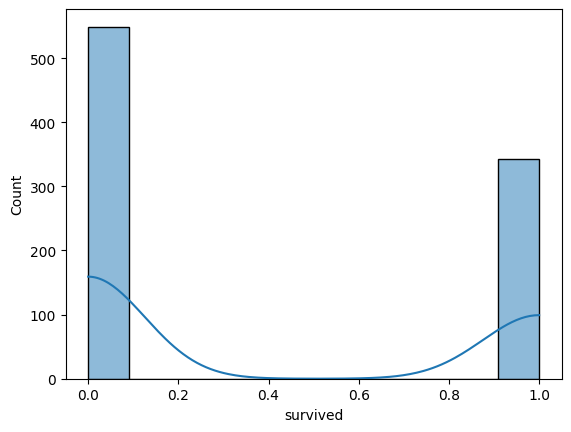

In [22]:
sns.histplot(df['survived'],kde=True)

In [23]:
df['Age_mean']=df['survived'].fillna(df['survived'].mean())

In [24]:
df[['Age_mean','survived']]

,Age_mean,survived
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [20]:
df.sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

2- Median Value Imputation- If we have outliers in the dataset

In [25]:
df['Age_median']=df['survived'].fillna(df['survived'].median())

In [26]:
df[['Age_median','Age_mean','survived']]

,Age_median,Age_mean,survived
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,0,0,0
...,...,...,...
886,0,0,0
887,1,1,1
888,0,0,0
889,1,1,1


3-Mode Imputation Technique--Categorical vlaues

In [29]:
df[df['sibsp'].isnull()]

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone,Age_mean,Age_median


In [30]:
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [32]:
mode_value=df[df['sibsp'].notna()]['sibsp'].mode()[0]

In [33]:
df['embarked_mode']=df['sibsp'].fillna(mode_value)

In [34]:
df[['embarked_mode','sibsp']]

,embarked_mode,sibsp
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
886,0,0
887,0,0
888,1,1
889,0,0


In [35]:
df['embarked_mode'].isnull().sum()

np.int64(0)